In [ ]:
!pip install ollama

In [9]:
from google.colab import files
uploaded = files.upload()

Saving SPY.csv to SPY (1).csv


In [3]:
import pandas as pd

cosine = pd.read_csv("cosine_features_per_article.csv")
nli = pd.read_csv("nli_analysis_all_articles.csv")

merged = pd.merge(cosine, nli, on="Article_Index")
merged.head()

,cos_sim_test_1,cos_sim_test_2,cos_sim_test_3,cos_sim_test_4,cos_sim_test_5,cos_sim_test_6,cos_sim_test_7,cos_sim_test_8,Article_Index,Date,...,Hypothesis_7_Sentence,Hypothesis_7_Entailment,Hypothesis_7_Neutral,Hypothesis_7_Contradiction,Hypothesis_7_Error,Hypothesis_8_Sentence,Hypothesis_8_Entailment,Hypothesis_8_Neutral,Hypothesis_8_Contradiction,Hypothesis_8_Error
0,0.372362,0.391802,0.380921,0.392079,0.452274,0.430433,0.422805,0.416653,1,1/26/2013,...,There was a bad inflation report yesterday,0.017905,0.952633,0.029463,NaN,There was a good inflation report yesterday,0.017721,0.951480,0.030799,NaN
1,0.660270,0.624892,0.607903,0.577416,0.415185,0.452376,0.492783,0.518007,2,1/26/2013,...,There was a bad inflation report yesterday,0.025277,0.940796,0.033927,NaN,There was a good inflation report yesterday,0.025002,0.941226,0.033772,NaN
2,0.455655,0.435678,0.440792,0.415236,0.408833,0.442924,0.415510,0.436396,3,1/27/2013,...,There was a bad inflation report yesterday,0.016157,0.913160,0.070683,NaN,There was a good inflation report yesterday,0.016323,0.914088,0.069589,NaN
3,0.393652,0.399483,0.365151,0.363933,0.358883,0.382494,0.338671,0.354038,4,1/27/2013,...,There was a bad inflation report yesterday,0.016178,0.974601,0.009221,NaN,There was a good inflation report yesterday,0.016224,0.974115,0.009661,NaN
4,0.354109,0.295746,0.345475,0.282385,0.316727,0.391504,0.291255,0.363418,5,1/28/2013,...,There was a bad inflation report yesterday,0.003787,0.910191,0.086023,NaN,There was a good inflation report yesterday,0.003812,0.908650,0.087539,NaN


In [4]:
list(merged.columns)

['cos_sim_test_1',
 'cos_sim_test_2',
 'cos_sim_test_3',
 'cos_sim_test_4',
 'cos_sim_test_5',
 'cos_sim_test_6',
 'cos_sim_test_7',
 'cos_sim_test_8',
 'Article_Index',
 'Date',
 'Article_Text',
 'Hypothesis_1_Sentence',
 'Hypothesis_1_Entailment',
 'Hypothesis_1_Neutral',
 'Hypothesis_1_Contradiction',
 'Hypothesis_1_Error',
 'Hypothesis_2_Sentence',
 'Hypothesis_2_Entailment',
 'Hypothesis_2_Neutral',
 'Hypothesis_2_Contradiction',
 'Hypothesis_2_Error',
 'Hypothesis_3_Sentence',
 'Hypothesis_3_Entailment',
 'Hypothesis_3_Neutral',
 'Hypothesis_3_Contradiction',
 'Hypothesis_3_Error',
 'Hypothesis_4_Sentence',
 'Hypothesis_4_Entailment',
 'Hypothesis_4_Neutral',
 'Hypothesis_4_Contradiction',
 'Hypothesis_4_Error',
 'Hypothesis_5_Sentence',
 'Hypothesis_5_Entailment',
 'Hypothesis_5_Neutral',
 'Hypothesis_5_Contradiction',
 'Hypothesis_5_Error',
 'Hypothesis_6_Sentence',
 'Hypothesis_6_Entailment',
 'Hypothesis_6_Neutral',
 'Hypothesis_6_Contradiction',
 'Hypothesis_6_Error',
 'Hypo

In [12]:
spy = pd.read_csv("SPY (1).csv")
spy.head()

,timestamp,open,high,low,close,volume,prev_day_percent_change
0,1999-11-01,136.5000,137.0000,135.5625,135.5625,4006500,NaN
1,1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900,NaN
2,1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300,-0.714652
3,1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500,0.673360
4,1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500,0.761033


In [33]:
# Ensure both date columns are datetime
spy['timestamp'] = pd.to_datetime(spy['timestamp'])
merged['Date'] = pd.to_datetime(merged['Date'])

# Join on date
merged_with_market = pd.merge(
    merged,
    spy[['timestamp', 'prev_day_percent_change']],
    left_on='Date',
    right_on='timestamp',
    how='inner'
)

# Drop extra timestamp column after merge
merged_with_market = merged_with_market.drop(columns=['timestamp'])

# Rename for clarity if needed
merged_with_market.rename(columns={'prev_day_percent_change': 'market_change'}, inplace=True)

merged_with_market.head()

,cos_sim_test_1,cos_sim_test_2,cos_sim_test_3,cos_sim_test_4,cos_sim_test_5,cos_sim_test_6,cos_sim_test_7,cos_sim_test_8,Article_Index,Date,...,Hypothesis_7_Entailment,Hypothesis_7_Neutral,Hypothesis_7_Contradiction,Hypothesis_7_Error,Hypothesis_8_Sentence,Hypothesis_8_Entailment,Hypothesis_8_Neutral,Hypothesis_8_Contradiction,Hypothesis_8_Error,market_change
0,0.354109,0.295746,0.345475,0.282385,0.316727,0.391504,0.291255,0.363418,5,2013-01-28,...,0.003787,0.910191,0.086023,NaN,There was a good inflation report yesterday,0.003812,0.908650,0.087539,NaN,0.562211
1,0.455681,0.400793,0.442817,0.376752,0.516019,0.589931,0.379455,0.434519,6,2013-01-28,...,0.021899,0.939892,0.038209,NaN,There was a good inflation report yesterday,0.020607,0.941841,0.037552,NaN,0.562211
2,0.321639,0.311032,0.270990,0.257073,0.307637,0.339808,0.317138,0.335945,7,2013-01-28,...,0.005753,0.984580,0.009667,NaN,There was a good inflation report yesterday,0.005849,0.984034,0.010117,NaN,0.562211
3,0.437397,0.400424,0.428030,0.387001,0.427663,0.426583,0.454966,0.453636,8,2013-01-29,...,0.023323,0.857124,0.119553,NaN,There was a good inflation report yesterday,0.023043,0.856924,0.120033,NaN,-0.119800
4,0.483095,0.495256,0.453837,0.458068,0.504851,0.519527,0.494465,0.504449,9,2013-01-29,...,0.002781,0.957807,0.039412,NaN,There was a good inflation report yesterday,0.002816,0.955599,0.041585,NaN,-0.119800


In [35]:
# Drop non-numeric and unused columns
drop_cols = ['Article_Index', 'Date', 'Article_Text'] + \
            [col for col in merged_with_market.columns if 'Sentence' in col or 'Error' in col]

# Define feature matrix X and target y
X = merged_with_market.drop(columns=drop_cols)
X = X.drop(columns='market_change')
y = merged_with_market['market_change']

X.head()

,cos_sim_test_1,cos_sim_test_2,cos_sim_test_3,cos_sim_test_4,cos_sim_test_5,cos_sim_test_6,cos_sim_test_7,cos_sim_test_8,Hypothesis_1_Entailment,Hypothesis_1_Neutral,...,Hypothesis_5_Contradiction,Hypothesis_6_Entailment,Hypothesis_6_Neutral,Hypothesis_6_Contradiction,Hypothesis_7_Entailment,Hypothesis_7_Neutral,Hypothesis_7_Contradiction,Hypothesis_8_Entailment,Hypothesis_8_Neutral,Hypothesis_8_Contradiction
0,0.354109,0.295746,0.345475,0.282385,0.316727,0.391504,0.291255,0.363418,0.003809,0.906726,...,0.087369,0.003813,0.909153,0.087034,0.003787,0.910191,0.086023,0.003812,0.908650,0.087539
1,0.455681,0.400793,0.442817,0.376752,0.516019,0.589931,0.379455,0.434519,0.023520,0.940880,...,0.038397,0.020382,0.942368,0.037250,0.021899,0.939892,0.038209,0.020607,0.941841,0.037552
2,0.321639,0.311032,0.270990,0.257073,0.307637,0.339808,0.317138,0.335945,0.005803,0.984131,...,0.009939,0.005833,0.984304,0.009863,0.005753,0.984580,0.009667,0.005849,0.984034,0.010117
3,0.437397,0.400424,0.428030,0.387001,0.427663,0.426583,0.454966,0.453636,0.025253,0.850148,...,0.119813,0.023203,0.856832,0.119964,0.023323,0.857124,0.119553,0.023043,0.856924,0.120033
4,0.483095,0.495256,0.453837,0.458068,0.504851,0.519527,0.494465,0.504449,0.002798,0.956894,...,0.039146,0.002808,0.955573,0.041619,0.002781,0.957807,0.039412,0.002816,0.955599,0.041585


In [58]:
#1:Read data in
import pandas as pd
import ast
import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.datasets
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow.keras.optimizers
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np


# --- Step 2: Train/Val/Test Split ---
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# --- Step 3: Normalize ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# --- Step 4: Define the model ---
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))  # linear for regression

# --- Step 5: Compile ---
model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

# --- Step 6: Train ---
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)

model.fit(
    X_train_scaled, y_train,
    batch_size=64,
    epochs=150,
    verbose=1,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping]
)

# --- Step 7: Evaluate ---
val_loss, val_mae = model.evaluate(X_val_scaled, y_val)

# --- Step 8: Predict ---
y_pred = model.predict(X_test_scaled)

# --- Step 9: Save predictions ---
results = pd.DataFrame({
    'predicted_change': y_pred.flatten(),
    'actual_change': np.array(y_test).flatten()
})


print(results.head())

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8091 - mae: 0.8772 - val_loss: 1.3511 - val_mae: 0.7579
Epoch 2/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6547 - mae: 0.8099 - val_loss: 1.3879 - val_mae: 0.7618
Epoch 3/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7098 - mae: 0.8272 - val_loss: 1.3285 - val_mae: 0.7567
Epoch 4/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6725 - mae: 0.8244 - val_loss: 1.3691 - val_mae: 0.7562
Epoch 5/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6181 - mae: 0.7962 - val_loss: 1.3554 - val_mae: 0.7536
Epoch 6/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6043 - mae: 0.8089 - val_loss: 1.3848 - val_mae: 0.7598
Epoch 7/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6165 - mae: 0.8090 - val_loss: 1.3576 - val_mae: 0.7560
Epoch 8/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5982 - mae: 0.8130 - val_loss: 1.3655 - val_mae: 0.7541
Epoch 9/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5455 - mae: 0.7

In [59]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2:.4f}")


R² score: 0.0302


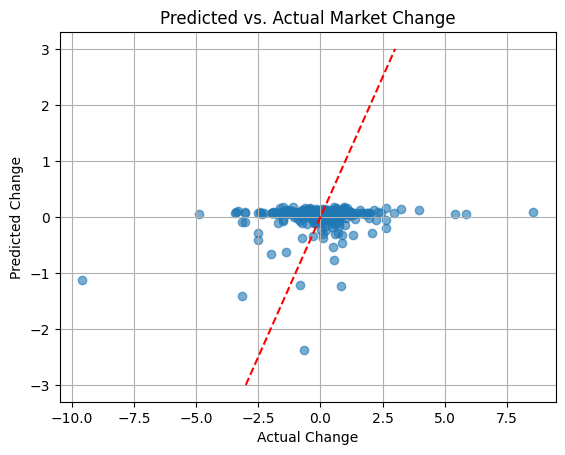

In [60]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Change")
plt.ylabel("Predicted Change")
plt.title("Predicted vs. Actual Market Change")
plt.plot([-3, 3], [-3, 3], 'r--')  # ideal prediction line
plt.grid(True)
plt.show()


In [61]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R²: 0.030159224935331852
MSE: 1.5382618064579132
MAE: 0.7950641777594691


In [45]:
#1:Read data in
import pandas as pd
import ast
import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.datasets
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow.keras.optimizers
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np


# --- Step 1: Convert regression target to binary ---
y_binary = (y > 0).astype(int)

# --- Step 2: Train/Val/Test Split ---
X_train, X_temp, y_train, y_temp = train_test_split(X, y_binary, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# --- Step 3: Normalize ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# --- Step 4: Define binary classification model ---
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # sigmoid for binary classification

# --- Step 5: Compile ---
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

# --- Step 6: Train ---
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)

model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    class_weight={0: 1.5, 1: 1.0},  # tune these
    batch_size=64,
    epochs=150,
    verbose=1,
    callbacks=[early_stopping]
)

# --- Step 7: Evaluate ---
val_loss, val_acc = model.evaluate(X_val_scaled, y_val)

# --- Step 8: Predict ---
y_pred_proba = model.predict(X_test_scaled)
y_pred_class = (y_pred_proba >= 0.5).astype(int)

# --- Step 9: Save predictions ---
results = pd.DataFrame({
    'predicted_label': y_pred_class.flatten(),
    'predicted_proba': y_pred_proba.flatten(),
    'actual_label': y_test
})

print(results.head())

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4851 - loss: 0.8829 - val_accuracy: 0.4508 - val_loss: 0.7010
Epoch 2/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4609 - loss: 0.8460 - val_accuracy: 0.4668 - val_loss: 0.6970
Epoch 3/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4654 - loss: 0.8425 - val_accuracy: 0.4531 - val_loss: 0.7137
Epoch 4/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4424 - loss: 0.8436 - val_accuracy: 0.4760 - val_loss: 0.7069
Epoch 5/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4548 - loss: 0.8464 - val_accuracy: 0.4554 - val_loss: 0.7076
Epoch 6/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4464 - loss: 0.8433 - val_accuracy: 0.4851 - val_loss: 0.6993
Epoch 7/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4294 - loss: 0.8517 - val_accuracy: 0.4554 - val_loss: 0.7044
Epoch 8/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4286 - loss: 0.8393 - val_accuracy: 0.4531 - val_loss: 0.7

In [46]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2:.4f}")


R² score: -1.1723


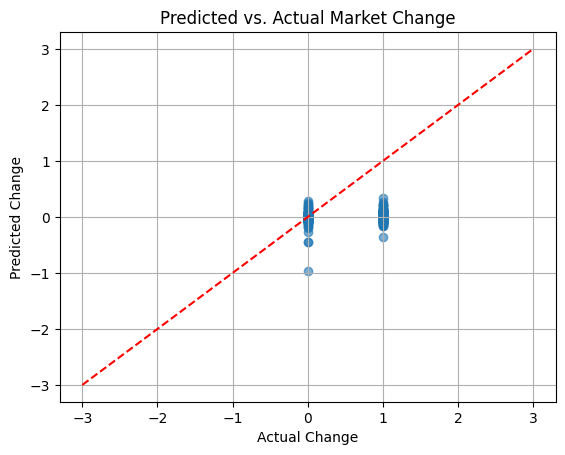

In [47]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Change")
plt.ylabel("Predicted Change")
plt.title("Predicted vs. Actual Market Change")
plt.plot([-3, 3], [-3, 3], 'r--')  # ideal prediction line
plt.grid(True)
plt.show()


In [48]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R²: -1.172252893447876
MSE: 0.5362354516983032
MAE: 0.5696498155593872


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.43      0.70      0.53       194
           1       0.52      0.26      0.35       243

    accuracy                           0.46       437
   macro avg       0.48      0.48      0.44       437
weighted avg       0.48      0.46      0.43       437



In [50]:
# Get binary labels: 1 for positive change, 0 for negative/zero
y_binary = (y > 0).astype(int)

# Count positives and negatives
pos_indices = y_binary[y_binary == 1].index
neg_indices = y_binary[y_binary == 0].index

print("Positive samples:", len(pos_indices))
print("Negative samples:", len(neg_indices))

# Make both sets the same size
min_len = min(len(pos_indices), len(neg_indices))
pos_sample = X.loc[pos_indices].sample(min_len, random_state=42)
neg_sample = X.loc[neg_indices].sample(min_len, random_state=42)

# Concatenate and shuffle
X_balanced = pd.concat([pos_sample, neg_sample])
y_balanced = y.loc[X_balanced.index]
y_binary_balanced = (y_balanced > 0).astype(int)

# Shuffle the data
from sklearn.utils import shuffle
X_balanced, y_binary_balanced = shuffle(X_balanced, y_binary_balanced, random_state=42)


Positive samples: 2438
Negative samples: 1929


In [51]:
# --- Step 3: Normalize ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# --- Step 4: Define binary classification model ---
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # sigmoid for binary classification

# --- Step 5: Compile ---
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

# --- Step 6: Train ---
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)

model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    class_weight={0: 1.5, 1: 1.0},  # tune these
    batch_size=64,
    epochs=150,
    verbose=1,
    callbacks=[early_stopping]
)

# --- Step 7: Evaluate ---
val_loss, val_acc = model.evaluate(X_val_scaled, y_val)

# --- Step 8: Predict ---
y_pred_proba = model.predict(X_test_scaled)
y_pred_class = (y_pred_proba >= 0.5).astype(int)

# --- Step 9: Save predictions ---
results = pd.DataFrame({
    'predicted_label': y_pred_class.flatten(),
    'predicted_proba': y_pred_proba.flatten(),
    'actual_label': y_test
})

print(results.head())

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4763 - loss: 0.8994 - val_accuracy: 0.4668 - val_loss: 0.6952
Epoch 2/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4829 - loss: 0.8454 - val_accuracy: 0.4531 - val_loss: 0.7013
Epoch 3/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4492 - loss: 0.8404 - val_accuracy: 0.4737 - val_loss: 0.7039
Epoch 4/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4677 - loss: 0.8419 - val_accuracy: 0.4577 - val_loss: 0.6976
Epoch 5/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4441 - loss: 0.8440 - val_accuracy: 0.4531 - val_loss: 0.7075
Epoch 6/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4358 - loss: 0.8425 - val_accuracy: 0.4531 - val_loss: 0.7010
Epoch 7/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4619 - loss: 0.8433 - val_accuracy: 0.4531 - val_loss: 0.7040
Epoch 8/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4399 - loss: 0.8384 - val_accuracy: 0.4508 - val_loss: 0.7

In [52]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2:.4f}")


R² score: -1.1723


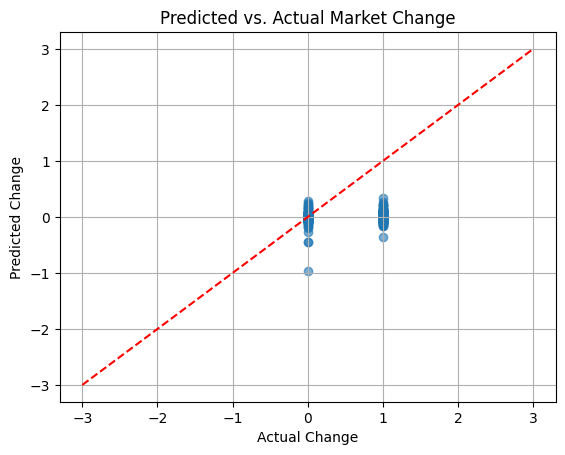

In [53]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Change")
plt.ylabel("Predicted Change")
plt.title("Predicted vs. Actual Market Change")
plt.plot([-3, 3], [-3, 3], 'r--')  # ideal prediction line
plt.grid(True)
plt.show()


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.46      0.72      0.56       194
           1       0.59      0.33      0.42       243

    accuracy                           0.50       437
   macro avg       0.53      0.52      0.49       437
weighted avg       0.53      0.50      0.48       437



In [55]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.5 MB/s eta 0:00:00


In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt

# --- STEP 1: Load your real data ---
# X = features from your merged_with_market
# y = merged_with_market['market_change']
y_binary = (y > 0).astype(int)

# --- STEP 2: Normalize ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- STEP 3: Train/Val/Test Split ---
X_train_scaled, X_temp, y_train, y_temp = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)
X_val_scaled, X_test_scaled, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# --- STEP 4: Define Model Builder ---
def build_model(hp):
    model = Sequential()
    model.add(Dense(
        hp.Int('units_input', min_value=64, max_value=256, step=64),
        activation=hp.Choice('activation_input', ['relu', 'tanh']),
        input_shape=(X.shape[1],)
    ))

    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=64, max_value=512, step=64),
            activation=hp.Choice(f'activation_{i}', ['relu', 'tanh'])
        ))
        if hp.Boolean(f'dropout_{i}'):
            model.add(Dropout(rate=hp.Float(f'dropout_rate_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Float('lr', 1e-5, 1e-3, sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# --- STEP 5: Hyperparameter Search ---
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=30,
    factor=3,
    directory='hyperband_dir',
    project_name='tlt_direction_classifier'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

tuner.search(
    X_train_scaled, y_train,
    epochs=50,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping],
    batch_size=64
)

# --- STEP 6: Evaluate Best Models ---
best_models = tuner.get_best_models(num_models=15)

for idx, model in enumerate(best_models):
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)
    print(f"Model {idx+1}: Test Accuracy = {test_accuracy:.4f}, Loss = {test_loss:.4f}")


Trial 90 Complete [00h 00m 04s]
val_accuracy: 0.5560640692710876

Best val_accuracy So Far: 0.5720824003219604
Total elapsed time: 00h 06m 18s
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5626 - loss: 0.6874  
Model 1: Test Accuracy = 0.5355, Loss = 0.6954
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5681 - loss: 0.6857  
Model 2: Test Accuracy = 0.5561, Loss = 0.6870
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5764 - loss: 0.6830  
Model 3: Test Accuracy = 0.5492, Loss = 0.6917
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5515 - loss: 0.6845  
Model 4: Test Accuracy = 0.5286, Loss = 0.6931
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5648 - loss: 0.6850  
Model 5: Test Accuracy = 0.5515, Loss = 0.6909
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5659 - loss: 0.6846  
Model 6: Test Accuracy = 0.5423, Loss = 0.6922
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5705 - loss: 0.6847  
Model 7: Test Accuracy = 0.5469, Loss = 0.6907
14/

In [57]:
import pandas as pd

# Get the top 15 hyperparameter configurations
best_hps = tuner.get_best_hyperparameters(num_trials=15)

# Convert to DataFrame
hp_dicts = []
for i, hp in enumerate(best_hps):
    hp_values = hp.values.copy()
    hp_values['model_index'] = i + 1
    hp_dicts.append(hp_values)

hp_df = pd.DataFrame(hp_dicts)
print(hp_df)


    units_input activation_input  num_layers  units_0 activation_0  dropout_0  \
0           128             relu           1      192         relu      False   
1           192             relu           1       64         relu       True   
2           128             relu           1      192         relu      False   
3           128             tanh           2      384         relu      False   
4           128             tanh           1      128         tanh       True   
5           128             relu           1      192         relu      False   
6            64             relu           2      448         tanh       True   
7           192             relu           2      128         tanh      False   
8           192             relu           3      320         tanh       True   
9           192             relu           2      384         relu      False   
10          192             relu           2      128         tanh      False   
11          256             